**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_integration",
    "fcc_astarr_macs_input_overlap",
    "analysis_enrichment_v2"
)
txt_fname = "results.enrich.fcc_active_vs_inactive.perm_n10k.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_fit_summary = dat
print(dim(dat))
head(dat)

[1] 2084    6


Group,Feature,Stat,Pval,Score,Padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Enhancer,H2AFZ,35.764202,0.0000,1.6208491,0.000000000
Enhancer,H3K27ac,28.537164,0.0000,1.1127810,0.000000000
Enhancer,H3K27me3,-2.765306,0.0049,-1.0878141,0.005574017
Enhancer,H3K36me3,-14.052677,0.0000,-1.8813276,0.000000000
Enhancer,H3K4me1,22.520019,0.0000,0.6897697,0.000000000
Enhancer,H3K4me2,28.681501,0.0000,1.1229281,0.000000000


## Explore

In [3]:
dat = dat_fit_summary
dat = dat %>% dplyr::filter(Feature == "EP300")
dat

Group,Feature,Stat,Pval,Score,Padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Enhancer,EP300,39.3804262,0.0000,1.8750733,0.0000000
Silencer,EP300,0.2868687,0.7846,-0.9035866,0.8124085
TSS:Enhancer,EP300,-11.3455262,0.0000,-1.3960104,0.0000000
TSS:Silencer,EP300,-2.2277114,0.0248,-1.7424403,0.5383667


In [12]:
dat = dat_fit_summary
dat = dat %>% 
    dplyr::filter(Group == "Enhancer") %>%
    dplyr::filter(Stat > 39.5)

dat_fit_summary_subset = dat
dat

Group,Feature,Stat,Pval,Score,Padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Enhancer,ATF3,46.77179,0,2.394693,0
Enhancer,ATF4,40.16247,0,1.930051,0
Enhancer,DMBX1,40.13507,0,1.928125,0
Enhancer,FOSL1,45.78923,0,2.325619,0
Enhancer,JUN,40.36707,0,1.944436,0
Enhancer,JUNB,43.26881,0,2.148431,0
Enhancer,JUND,50.36474,0,2.647282,0
Enhancer,ZNF175,45.87287,0,2.331499,0
Enhancer,ZNF281,45.66145,0,2.316636,0


In [13]:
vec_txt_region_group = c(
    "Enhancer", "TSS:Enhancer", "Silencer", "TSS:Silencer"
)

In [14]:
vec_txt_feature_subset = dat_fit_summary_subset$Feature

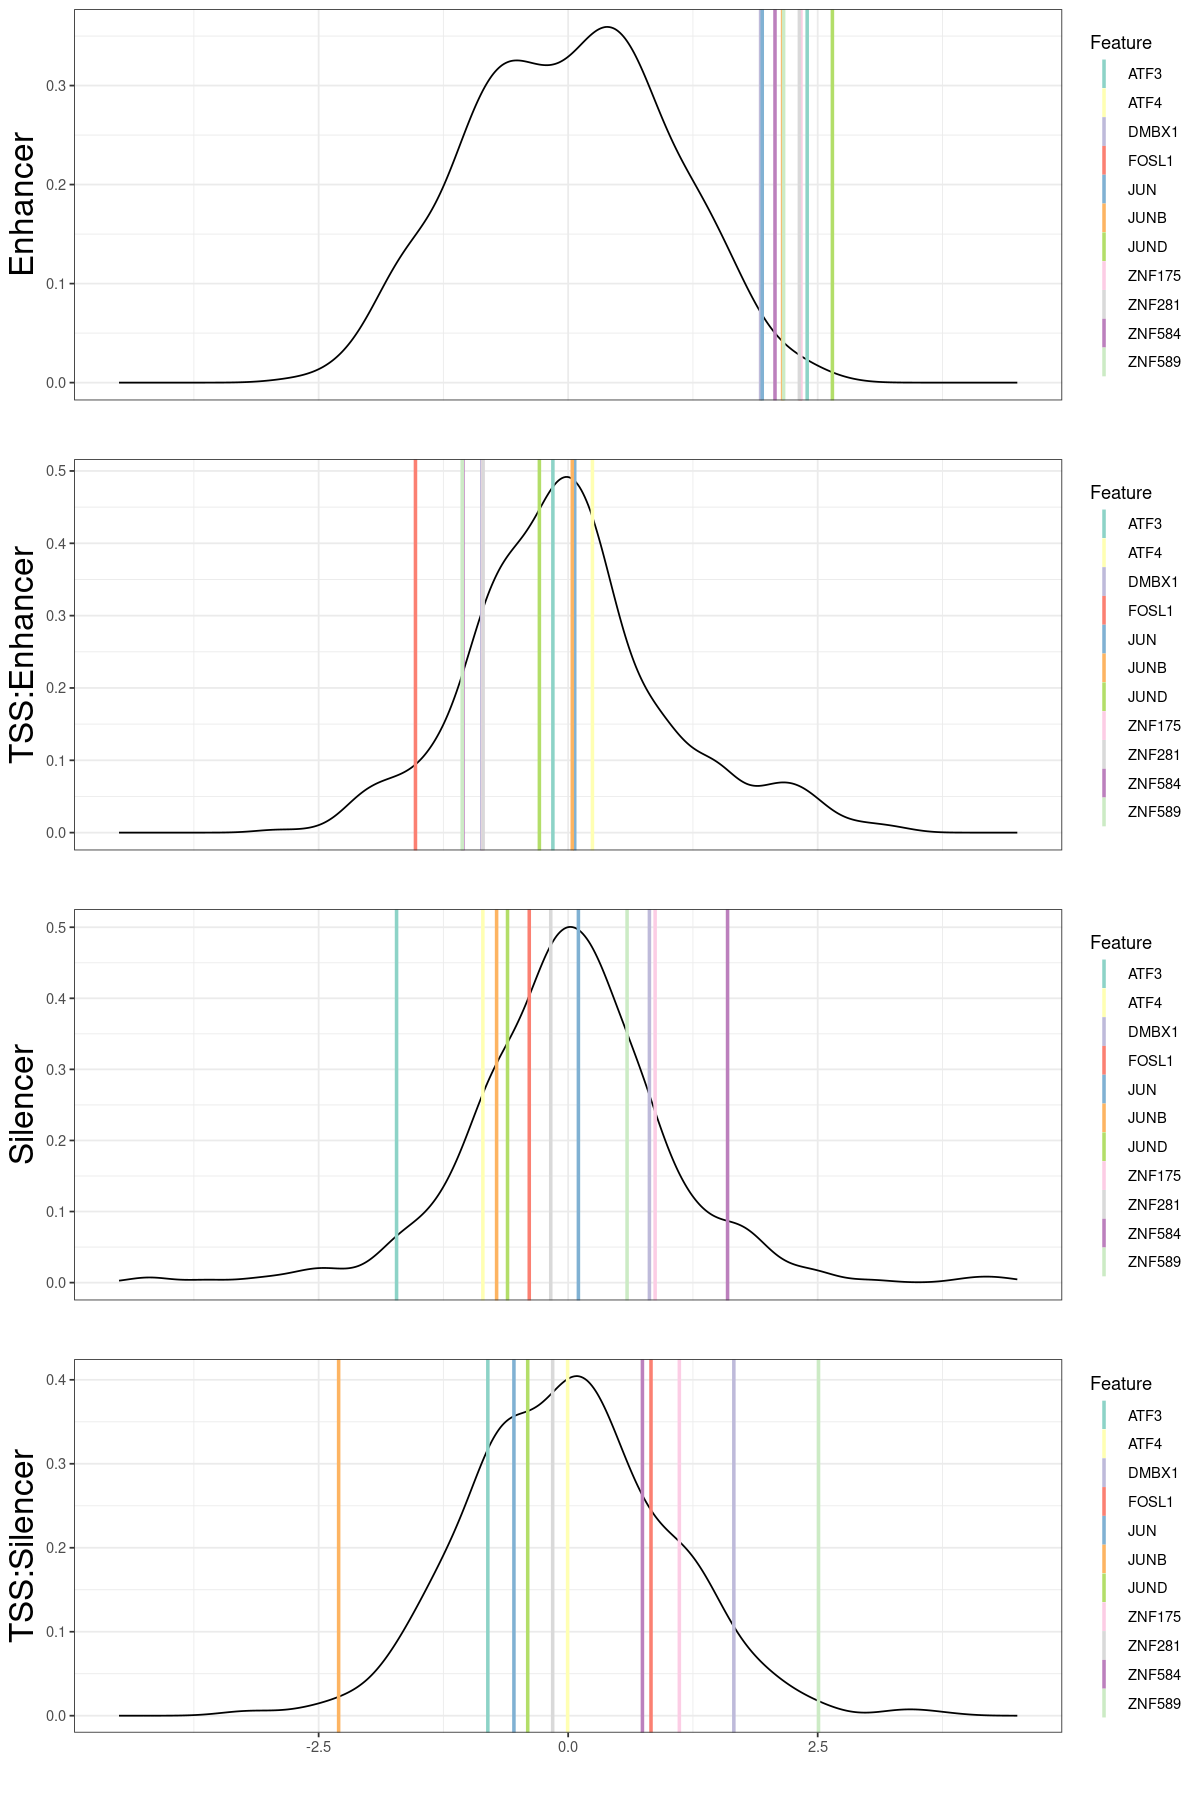

In [16]:
### split
dat = dat_fit_summary
lst = split(dat, dat$Group)

### reorder
lst = lst[vec_txt_region_group]

### generate plot
lst = lapply(names(lst), function(idx){
    dat = lst[[idx]]
    
    tmp = dat %>% dplyr::filter(Feature %in% vec_txt_feature_subset)
    tmp = tmp %>% dplyr::mutate(Feature = factor(Feature, levels=vec_txt_feature_subset))
    vec = tmp$Score
    
    gpt = ggplot() + 
        geom_density(data = dat, aes(x=Score)) +
        geom_vline(  data = tmp, aes(xintercept = Score, color = Feature), linewidth=1) +
        scale_colour_brewer(palette = "Set3") +
        labs(x = "", y = idx) +
        xlim(-4.5, 4.5) +
        theme_bw()
    return(gpt)
})

### adjust style
lst = lapply(lst, function(gpt){
    gpt = gpt + theme(axis.title   = element_text(size = 20))
    return(gpt)
})

### remove the label except for the most bottom one
lst[1:3] = lapply(lst[1:3], function(gpt){
    gpt = gpt + theme(
        axis.text.x  = element_blank(),
        axis.ticks.x = element_blank(),
        
    )
    return(gpt)
})

### assign and show
lst_gpt = lst

options(repr.plot.height = 15, repr.plot.width=10)
plot_grid(plotlist = lst_gpt, ncol = 1)